# Data Loading

- Drug Prescriber Dataset: https://www.cms.gov/ - “Medicare Provider Utilization and Payment Data: Part D Prescriber”
- Data on Overdose Deaths: https://www.data.gov/ - “Accidental and Drug Related Deaths”
- List of drugs classified as opiates: https://www.cdc.gov/drugoverdose/resources/data.html

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load Drug Prescriber Data in Pandas Dataframe
drug_prescriber_df = pd.read_csv("prescriber_information.csv")
drug_prescriber_df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [2]:
# Load Overdose Deaths Data in Pandas Dataframe
overdose_df = pd.read_csv("overdose_deaths.csv")
overdose_df.head()

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [3]:
# Load Overdose Deaths Data in Pandas Dataframe
opioid_df = pd.read_csv("opioid_drug_list.csv")
opioid_df.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


# Data Preprocessing

In [4]:
# Check for Missing Values
print("Drug Prescriber Data= ", drug_prescriber_df.isnull().values.any())
print("Overdose Data= ", overdose_df.isnull().values.any())
print("Drug List Data= ", opioid_df.isnull().values.any())

Drug Prescriber Data=  True
Overdose Data=  False
Drug List Data=  False


In [5]:
# Check for Specific Columns for Missing Values in Drug Prescriber Data
#pd.options.display.max_rows = 4000
drug_prescriber_df.isnull().sum()

NPI                                 0
Gender                              0
State                               0
Credentials                       763
Specialty                           0
ABILIFY                             0
ACETAMINOPHEN.CODEINE               0
ACYCLOVIR                           0
ADVAIR.DISKUS                       0
AGGRENOX                            0
ALENDRONATE.SODIUM                  0
ALLOPURINOL                         0
ALPRAZOLAM                          0
AMIODARONE.HCL                      0
AMITRIPTYLINE.HCL                   0
AMLODIPINE.BESYLATE                 0
AMLODIPINE.BESYLATE.BENAZEPRIL      0
AMOXICILLIN                         0
AMOX.TR.POTASSIUM.CLAVULANATE       0
AMPHETAMINE.SALT.COMBO              0
ATENOLOL                            0
ATORVASTATIN.CALCIUM                0
AVODART                             0
AZITHROMYCIN                        0
BACLOFEN                            0
BD.ULTRA.FINE.PEN.NEEDLE            0
BENAZEPRIL.H

In [6]:
# Check for Number of States in Two Datasets
set(drug_prescriber_df.State.unique()) - set(overdose_df.Abbrev.unique())

{'AA', 'AE', 'DC', 'GU', 'PR', 'VI', 'ZZ'}

In [7]:
import numpy as np
# Drug Prescriber Dataset Cleaning Credentials Column - Replace Missing Values with String Value
drug_prescriber_df.Credentials = drug_prescriber_df.Credentials.fillna('UNKNOWN')

# Clean Up States from Prescriber Data to match the list of states in Overdose Death Data
drug_prescriber_df= drug_prescriber_df[drug_prescriber_df.State != 'AE']
drug_prescriber_df = drug_prescriber_df[drug_prescriber_df.State != 'ZZ']
drug_prescriber_df = drug_prescriber_df[drug_prescriber_df.State != 'AA']
drug_prescriber_df = drug_prescriber_df[drug_prescriber_df.State != 'PR']
drug_prescriber_df = drug_prescriber_df[drug_prescriber_df.State != 'GU']
drug_prescriber_df = drug_prescriber_df[drug_prescriber_df.State != 'VI']

# Overdoses Data - Removing Commas in Numerical Values
overdose_df['Deaths'] = overdose_df['Deaths'].str.replace(',', '')
overdose_df['Deaths'] = overdose_df['Deaths'].astype(int)
overdose_df['Population'] = overdose_df['Population'].str.replace(',', '')
overdose_df['Population'] = overdose_df['Population'].astype(int)

# Calculating Death Density statewise with respect to population
overdose_df['Deaths/Population'] = (overdose_df['Deaths']/overdose_df['Population'])
overdose_df.head()

,State,Population,Deaths,Abbrev,Deaths/Population
0,Alabama,4833722,723,AL,0.000150
1,Alaska,735132,124,AK,0.000169
2,Arizona,6626624,1211,AZ,0.000183
3,Arkansas,2959373,356,AR,0.000120
4,California,38332521,4521,CA,0.000118


# Data Exploration - Descriptive Analysis


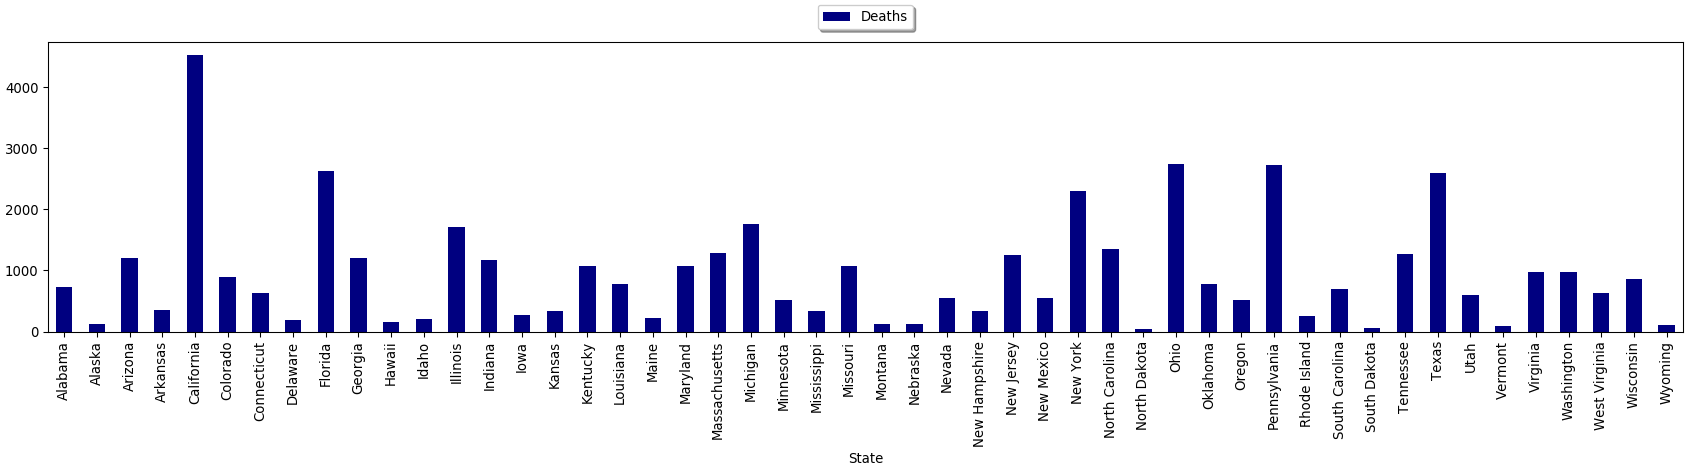

In [ ]:
import pixiedust

# Investigate Number of Deaths by Opioid w.r.t US States
display(overdose_df)


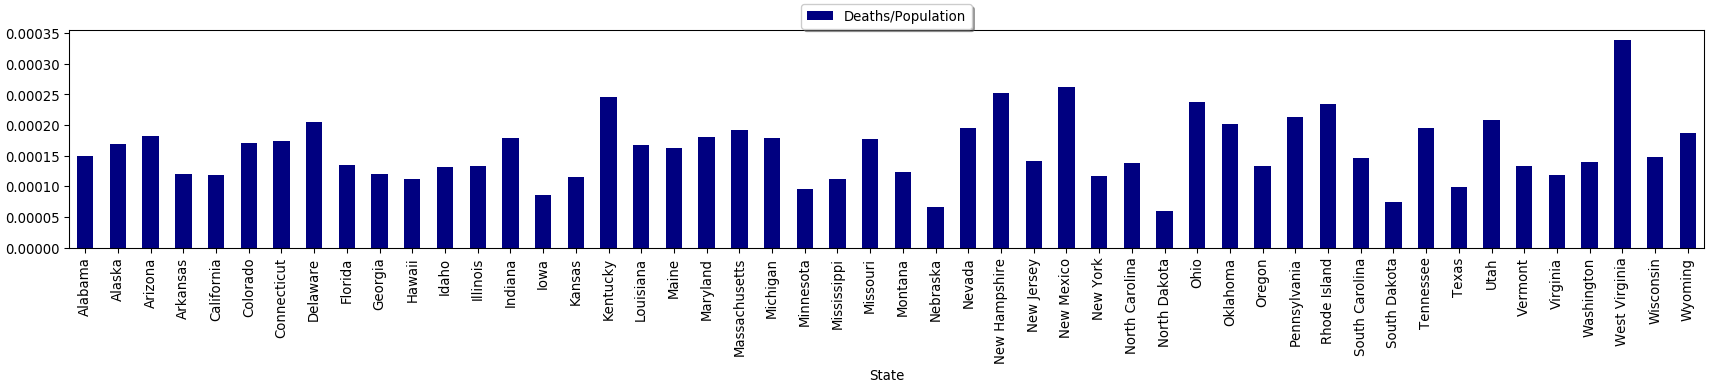

In [ ]:
# Investigate Number of Deaths by Opioid w.r.t Population and US States
display(overdose_df)

![title](Visualizations/Number_of_Deaths_Dashboard.png)

#### California has the highest number of deaths - 4521
#### West Virginia, New Mexico, New Hampshire, Kentucky, Ohio and Rhode Island have highest number of death rates

In [10]:
# Male-Female Ratio in Prescriber List
drug_prescriber_df.groupby('Gender').size() / drug_prescriber_df.groupby('Gender').size().sum()

Gender
F    0.378166
M    0.621834
dtype: float64

In [11]:
# Calculate Percentage of Opioid Prescription
drug_prescriber_df.groupby('Opioid.Prescriber').size() / drug_prescriber_df.groupby('Opioid.Prescriber').size().sum()

Opioid.Prescriber
0    0.41282
1    0.58718
dtype: float64

## Stats on Credentials and Specialities
![title](Visualizations/Opiod_Stats.png)

## Identifying Opioids from Prescriber Dataset

In [12]:
# Identifying Opioids from Prescriber Dataset
import re

ops = list(re.sub(r'[-\s]','.',x) for x in opioid_df.values[:,0])
prescribed_ops = list(set(ops) & set(drug_prescriber_df.columns))

for i,drug in enumerate(prescribed_ops):
    print (i+1,drug)

1 TRAMADOL.HCL
2 HYDROMORPHONE.HCL
3 OXYCODONE.HCL
4 FENTANYL
5 ACETAMINOPHEN.CODEINE
6 HYDROCODONE.ACETAMINOPHEN
7 MORPHINE.SULFATE.ER
8 MORPHINE.SULFATE
9 METHADONE.HCL
10 OXYCONTIN
11 OXYCODONE.ACETAMINOPHEN


<div style="color:blue">
<p>Insights:</p>
<ol>
    <li>There are 11 opioid drugs out of the 250 drugs mentioned in the prescribers data.</li>
    <li>60% of the prescribers on this list are opioid prescribers</li>
</ol>
</div>

## Prescribed Opioids vs Total Prescriptions

In [13]:
# No. of opioid prescribers out of the total prescribers
print(float(drug_prescriber_df['Opioid.Prescriber'].sum())*100/drug_prescriber_df.shape[0],"%")

58.71804192414879 %


In [14]:
prescriber_stat_df = drug_prescriber_df.copy()

In [15]:
prescriber_stat_df['NumOpioids'] = prescriber_stat_df.apply(lambda x: sum(x[prescribed_ops]),axis=1)
prescriber_stat_df['NumPrescriptions'] = prescriber_stat_df.apply(lambda x: sum(x.iloc[5:255]),axis=1)
prescriber_stat_df['OpiodPrescribedVsPrescriptions'] = prescriber_stat_df.apply(lambda x: float(x['NumOpioids'])/x['NumPrescriptions'],axis=1)

In [16]:
prescriber_stat_df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,NumOpioids,NumPrescriptions,OpiodPrescribedVsPrescriptions
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,1,17,29,0.586207
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,35,1,362,1418,0.255289
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,25,0,0,289,0.000000
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,1,559,1757,0.318156
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,17,28,0,0,0,1,66,179,0.368715


In [17]:
drug_prescriber_df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


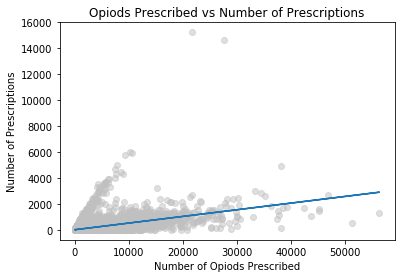

In [18]:
import matplotlib.pyplot as plt

N = prescriber_stat_df['NumOpioids'].shape[0]
x = prescriber_stat_df['NumPrescriptions']
y = prescriber_stat_df['NumOpioids']
colors = (192/255,192/255,192/255)
# area = np.pi*3
 
# Plot
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, c=colors, alpha=0.5)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-')

plt.title('Opiods Prescribed vs Number of Prescriptions')
plt.xlabel('Number of Opiods Prescribed')
plt.ylabel('Number of Prescriptions')
plt.show()

# Opioid Prescribers by Gender

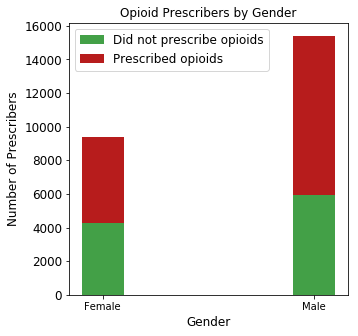

In [19]:
genderCount = np.array(list(prescriber_stat_df[['Gender','NPI']].groupby('Gender').count()['NPI']))

genderCount = np.append([genderCount],[list(prescriber_stat_df.loc[prescriber_stat_df['Opioid.Prescriber']>0,['Gender','NPI']].groupby('Gender').count()['NPI'])], axis=0)

genderCount[0] = genderCount[0]-genderCount[1]

fig = plt.gcf()
fig.set_size_inches(5, 5)

configs = genderCount[0]
N = configs.shape[0]
ind = np.arange(N)
width = 0.2

p1 = plt.bar(ind, genderCount[0], width, color='#43A047')
p2 = plt.bar(ind, genderCount[1], width, bottom=genderCount[0], color='#B71C1C')

plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=12)
plt.xticks(ind,["Female","Male"])
plt.xlabel('Gender', fontsize=12)
plt.title("Opioid Prescribers by Gender")
plt.legend([p1[0], p2[0]], ["Did not prescribe opioids","Prescribed opioids"], fontsize=12, fancybox=True)
plt.show()

<div style="color:blue">
The number of non opioid prescribers is similar in the case of Male and Female, though Prescribed Opioids is higher in the case of Male. This can be subject to the kind of Specialties Male and Female Prescribers prefer.
</div>

# Opioid Prescribers by State

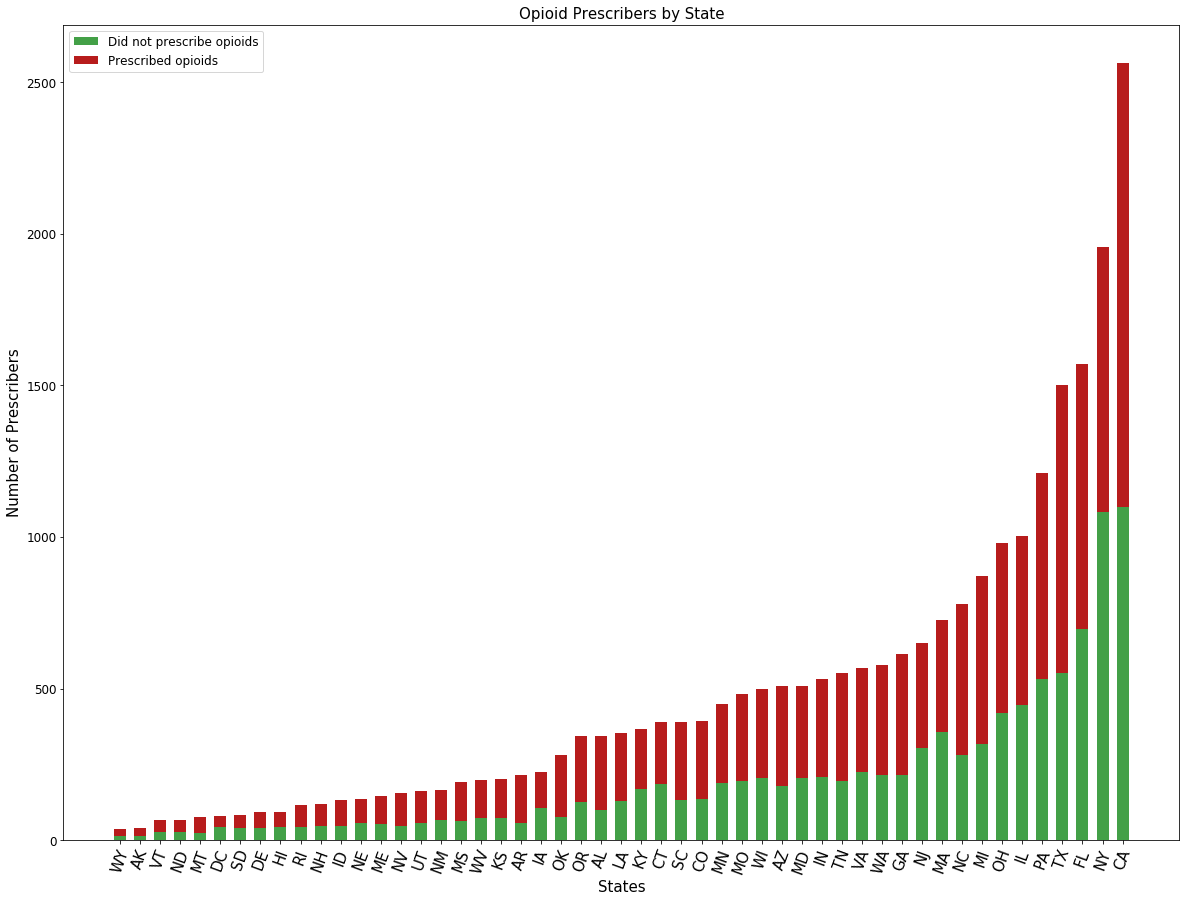

In [20]:
stateCount = pd.DataFrame(prescriber_stat_df[['State','NPI']].groupby('State').count())

stateCount.reset_index(level=0, inplace=True)

stateCount.columns = ['State', 'Total_Prescribers']

stateCount_PrescribedOpiods = pd.DataFrame(prescriber_stat_df.loc[prescriber_stat_df['Opioid.Prescriber']>0,['State','NPI']].groupby('State').count())
stateCount_PrescribedOpiods.reset_index(level=0, inplace=True)
stateCount_PrescribedOpiods.columns = ['State', 'Opiod_Prescribers']
stateCount = pd.merge(stateCount, stateCount_PrescribedOpiods,  how='left', on="State")

stateCount = stateCount.fillna(0)

stateCount = stateCount.sort_values('Total_Prescribers')

fig = plt.gcf()
fig.set_size_inches( 20, 15)

N = stateCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, stateCount['Total_Prescribers']-stateCount['Opiod_Prescribers'], width, color='#43A047')
p2 = plt.bar(ind, stateCount['Opiod_Prescribers'], width, bottom=stateCount['Total_Prescribers']-stateCount['Opiod_Prescribers'], color='#B71C1C')

# plt.ylim([0,120])
plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,stateCount['State'], fontsize=15, rotation=70)
plt.xlabel('States', fontsize=15)
plt.title("Opioid Prescribers by State", fontsize=15)
plt.legend([p1[0], p2[0]], ["Did not prescribe opioids","Prescribed opioids"], fontsize=12, fancybox=True)
plt.show()

<div style="color:blue">
States like CA, NY, FL, TX have higher opioid prescribers which corresponds with high death rates reported due to opioid overdose.
</div>

# Opioid Prescribers by Specialty (Sorted by num of Opioids prescribed)

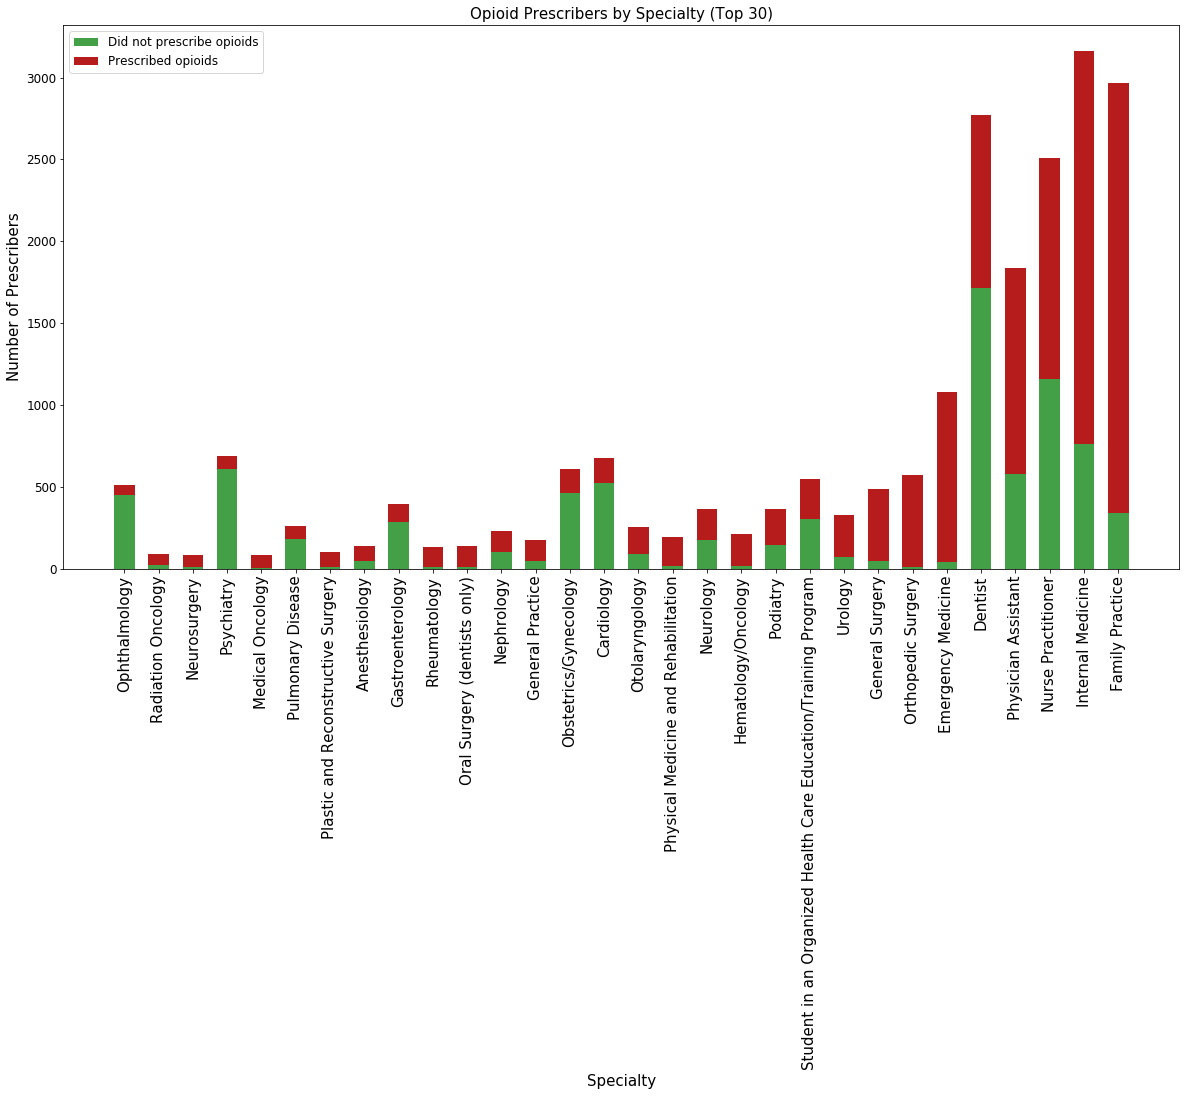

In [21]:
SpecialtyCount = pd.DataFrame(prescriber_stat_df[['Specialty','NPI']].groupby('Specialty').count())

SpecialtyCount.reset_index(level=0, inplace=True)

SpecialtyCount.columns = ['Specialty', 'Total_Prescribers']

SpecialtyCount_PrescribedOpiods = pd.DataFrame(prescriber_stat_df.loc[prescriber_stat_df['Opioid.Prescriber']>0,['Specialty','NPI']].groupby('Specialty').count())
SpecialtyCount_PrescribedOpiods.reset_index(level=0, inplace=True)

SpecialtyCount_PrescribedOpiods.columns = ['Specialty', 'Opiod_Prescribers']
SpecialtyCount = pd.merge(SpecialtyCount, SpecialtyCount_PrescribedOpiods,  how='left', on="Specialty")

SpecialtyCount = SpecialtyCount.fillna(0)

SpecialtyCount = SpecialtyCount.sort_values('Opiod_Prescribers')

SpecialtyCount = SpecialtyCount[-30::]

fig = plt.gcf()
fig.set_size_inches( 20, 10)

N = SpecialtyCount.shape[0]
ind = np.arange(N)
width = 0.6

p1 = plt.bar(ind, SpecialtyCount['Total_Prescribers']-SpecialtyCount['Opiod_Prescribers'], width, color='#43A047')
p2 = plt.bar(ind, SpecialtyCount['Opiod_Prescribers'], width, bottom=SpecialtyCount['Total_Prescribers']-SpecialtyCount['Opiod_Prescribers'], color='#B71C1C')

plt.yticks(fontsize=12)
plt.ylabel("Number of Prescribers", fontsize=15)
plt.xticks(ind,SpecialtyCount['Specialty'], fontsize=15, rotation=90)
plt.xlabel('Specialty', fontsize=15)
plt.title("Opioid Prescribers by Specialty (Top 30)", fontsize=15)
plt.legend([p1[0], p2[0]], ["Did not prescribe opioids","Prescribed opioids"], fontsize=12, fancybox=True)


# Principal Component Analysis

In [22]:
specialty = pd.DataFrame(prescriber_stat_df.groupby(['Specialty']).count()['NPI']).sort_values('NPI')

specialty.loc[specialty['NPI']<40].shape


rareSpecialty = list(specialty.loc[specialty['NPI']<40].index)


prescriber_stat_df.loc[prescriber_stat_df['Specialty'].isin(rareSpecialty),'Specialty'] = prescriber_stat_df.loc[prescriber_stat_df['Specialty'].isin(rareSpecialty),'Specialty'].apply(lambda x: 'Surgery' if 'Surgery' in list(x.split( )) else 'Other')

prescribersData = prescriber_stat_df.drop( ['NPI','Credentials'], axis=1)

prescribersData = pd.get_dummies(prescribersData, columns=['Gender','Specialty','State'], drop_first=True)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#convert it to numpy arrays
X= prescribersData.values

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=300)

pca.fit(X_scaled)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Text(0.5,1,'Scree Plot')

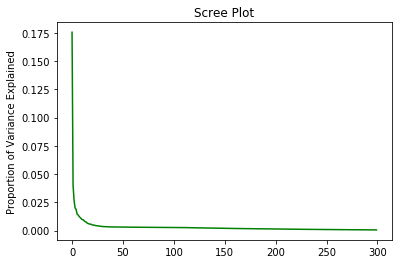

In [24]:
plt.plot(var, color='g')

plt.ylabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')

In [25]:
#Looking at above plot I'm taking 20 variables
pca = PCA(n_components=20)

# pca.fit(X_scaled)
X1=pca.fit_transform(X_scaled)

## Variance Explained by each Factor:

In [26]:
print ("Explained variance by component: %s" % pca.explained_variance_ratio_)

Explained variance by component: [0.17561584 0.04020311 0.02660154 0.02007652 0.01862653 0.01462168
 0.01384525 0.01247706 0.01152464 0.0107009  0.00971079 0.00964041
 0.00858109 0.00783706 0.00755872 0.00654355 0.00619295 0.00585003
 0.00571518 0.00555914]


In [27]:
print ("Variance explained by first 10 factors: %s" % (pca.explained_variance_ratio_[0:9].sum()/pca.explained_variance_ratio_.sum()))
print ("Since these explain ~80% of the variance they are selected for further analysis")

Variance explained by first 10 factors: 0.7990576197399858
Since these explain ~80% of the variance they are selected for further analysis


In [28]:
newFactors = pd.DataFrame(pca.components_,columns=prescribersData.columns)

#### Factor Loadings

Selecting the top 10 factors in terms of explained variance

In [29]:
newFactors = newFactors.loc[0:9]
newFactors

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.037425,0.043125,0.026385,0.070814,0.063719,0.069632,0.098693,0.070281,0.052133,0.079438,...,-0.000014,0.002554,-0.000983,-0.002036,-0.000818,-0.001077,-0.003044,-0.001075,0.001874,0.000437
1,0.199734,-0.018672,-0.008326,-0.024340,0.014890,-0.034764,-0.036206,0.077885,-0.046544,0.038059,...,0.003658,-0.000433,-0.001584,0.001930,0.000754,0.002198,0.002382,0.001833,-0.000593,-0.000467
2,-0.072716,0.044869,0.021971,0.018033,-0.008108,0.018201,0.004539,0.045440,-0.110852,0.077062,...,-0.002428,0.007317,0.000816,0.002747,0.000028,0.001241,0.002691,-0.001356,-0.000410,0.002081
3,-0.002859,-0.026621,-0.029778,-0.077723,0.015175,-0.079000,-0.032280,-0.014227,0.194486,-0.019435,...,0.002262,-0.000914,-0.003996,-0.002100,-0.001384,0.000845,0.003514,0.004476,-0.003277,-0.000723
4,0.047247,0.014200,0.001380,-0.000805,-0.094955,0.020061,0.009504,0.125591,0.006749,0.060447,...,-0.001595,0.000328,-0.004787,-0.002029,-0.000400,0.000924,-0.000168,0.001225,0.002926,-0.002854
5,0.013563,-0.000195,0.037300,-0.002061,-0.020919,0.010120,-0.003743,0.031591,-0.003191,0.004070,...,-0.001945,-0.002492,0.005673,-0.006164,-0.003719,0.002786,-0.006476,-0.004917,-0.003186,-0.003107
6,0.009451,-0.030790,-0.042920,-0.085098,0.007264,-0.012980,-0.021798,-0.040517,-0.002243,-0.009689,...,-0.001975,-0.000469,-0.001266,-0.003213,0.002287,-0.001206,0.003775,0.004669,-0.005221,-0.000792
7,0.026043,0.001701,-0.034526,0.083723,0.032409,0.024304,-0.054738,-0.036489,0.038035,-0.032325,...,-0.004390,-0.012819,0.011956,-0.002436,-0.001532,-0.004133,-0.010865,-0.010433,0.002153,-0.004279
8,0.057098,-0.023407,-0.005409,-0.088489,-0.031721,-0.021189,-0.014314,0.003914,0.031392,-0.062323,...,-0.003748,0.002417,0.004818,-0.000568,-0.008013,0.000888,-0.007630,-0.010239,0.004200,0.004622
9,-0.059424,-0.032050,-0.015529,-0.149950,0.048458,-0.009088,0.030132,0.027415,-0.025806,0.093120,...,0.001148,0.010178,0.014069,0.011815,0.001809,-0.003308,-0.006852,-0.010938,0.000370,0.001987


#### Important factors which constitute higher weightage in the newly discovered factors/components:

In [30]:
impFactors = list(set(pd.DataFrame(newFactors.max())[pd.DataFrame(newFactors.max()> 0.2)[0]].index)\
                  .union(set(pd.DataFrame(newFactors.min())[pd.DataFrame(newFactors.min()< -0.2)[0]].index)))
pd.DataFrame(impFactors)

,0
0,OXYCODONE.HCL
1,PRIMIDONE
2,VESICARE
3,NOVOLOG
4,RESTASIS
5,TRAVATAN.Z
6,LOVAZA
7,MORPHINE.SULFATE.ER
8,Specialty_Endocrinology
9,LUMIGAN


In [31]:
newFactors_ = newFactors[impFactors]

#### Factor Loadings Heatmap

[]

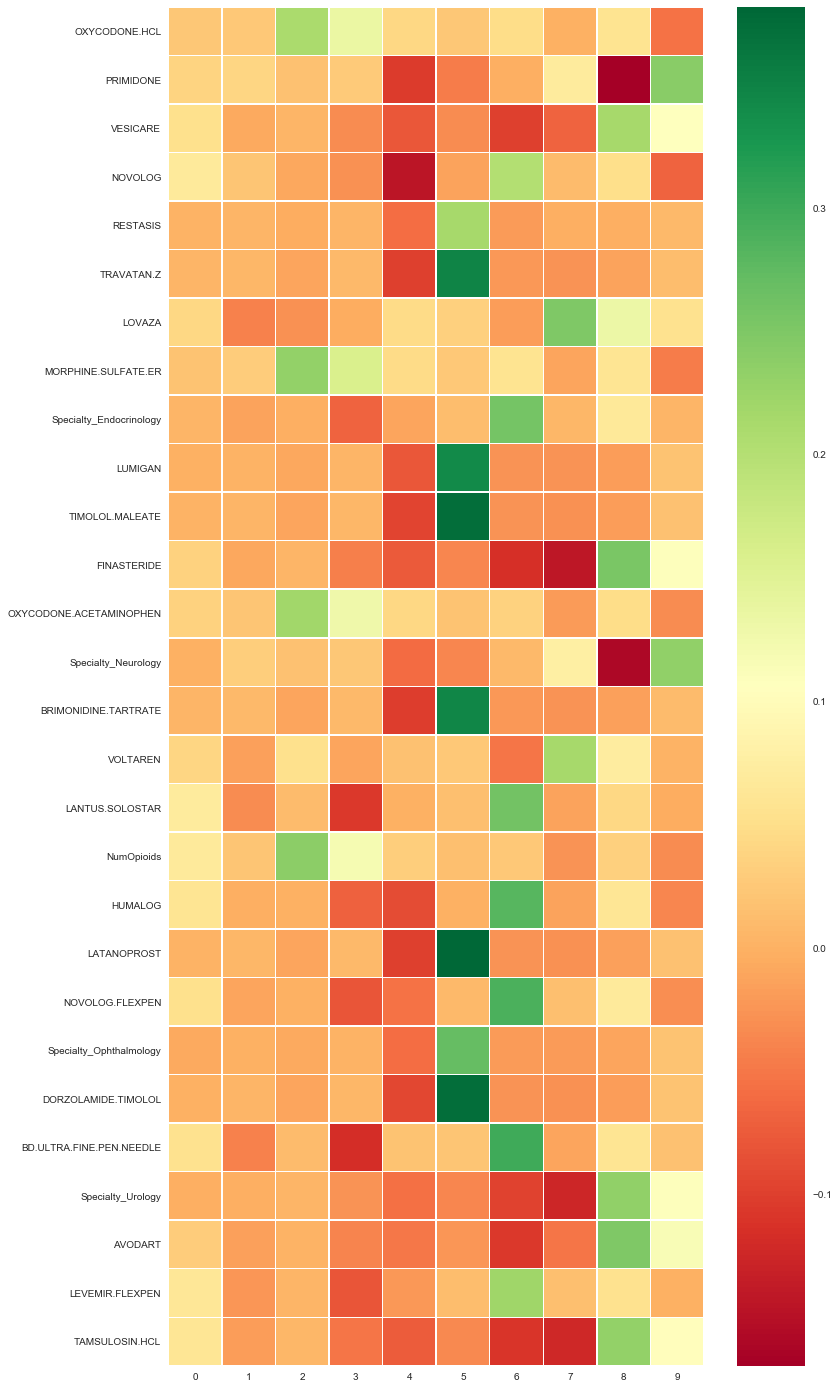

In [32]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,25)})
# sns.heatmap(newFactors.T, cmap='RdYlGn', linewidths=0.5, annot=True)
sns.heatmap(newFactors_.T, cmap='RdYlGn', linewidths=0.5)
plt.plot()

# Feature Engineering

In [33]:
# Remove Spacing and Special Characters from Drug Name and Replace it with .
import re
drug_name = opioid_df['Drug Name']
drug_name = drug_name.apply(lambda x:re.sub("\ |-",".",str(x)))
drug_name

0                             ABSTRAL
1               ACETAMINOPHEN.CODEINE
2                               ACTIQ
3                 ASCOMP.WITH.CODEINE
4      ASPIRIN.CAFFEINE.DIHYDROCODEIN
5                              AVINZA
6                    BELLADONNA.OPIUM
7                   BUPRENORPHINE.HCL
8      BUTALB.ACETAMINOPH.CAFF.CODEIN
9      BUTALB.CAFF.ACETAMINOPH.CODEIN
10        BUTALBITAL.COMPOUND.CODEINE
11               BUTORPHANOL.TARTRATE
12                            BUTRANS
13                  CAPITAL.W.CODEINE
14      CARISOPRODOL.COMPOUND.CODEINE
15       CARISOPRODOL.ASPIRIN.CODEINE
16                    CODEINE.SULFATE
17                           CO.GESIC
18                             CONZIP
19                            DEMEROL
20                            DEMEROL
21                           DILAUDID
22                           DILAUDID
23                        DILAUDID.HP
24                            DISKETS
25                      DOLOPHINE.HCL
26          

In [34]:
# Considering Features which are related to opioid compounds
opioid_drug_names = set(drug_prescriber_df.columns).intersection(set(drug_name))
opioid_drug_columns = []
# Removing redundant columns
for each in drug_prescriber_df.columns:
    if each in opioid_drug_names:
        pass
    else:
        opioid_drug_columns.append(each)
        
drug_prescriber_df = drug_prescriber_df[opioid_drug_columns]
drug_prescriber_df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [35]:
# Removing Credentials and NPI Column in order to trim our features down.
drug_prescriber_df = drug_prescriber_df.drop(drug_prescriber_df.columns[[0, 3]], axis=1) 
drug_prescriber_df.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,M,TX,Dentist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,F,AL,General Surgery,0,0,0,0,0,0,134,...,0,0,0,0,0,0,0,0,35,1
2,F,NY,General Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,M,AZ,Internal Medicine,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M,NV,Hematology/Oncology,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [36]:
# Convert Categorical Columns
categorical_columns = ['Gender','State','Specialty']

for column in categorical_columns:
    drug_prescriber_df[column] = pd.factorize(drug_prescriber_df[column], sort=True)[0]
drug_prescriber_df.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1,43,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,28,0,0,0,0,0,0,134,...,0,0,0,0,0,0,0,0,35,1
2,0,34,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1,3,41,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,33,35,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [37]:
# Train - Test Split
from sklearn.cross_validation import train_test_split
train_df, test_df = train_test_split(drug_prescriber_df, test_size=0.2, random_state=42)
print(train_df.shape)
print(test_df.shape)

(19807, 243)
(4952, 243)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
#Setting features
features = train_df.iloc[:,0:242]
features.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
11299,1,34,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17247,1,14,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14337,1,9,55,0,0,0,0,0,61,0,...,0,0,0,0,0,0,0,0,0,0
14452,1,35,89,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12366,1,9,69,0,0,0,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0


# Modeling 
## <span style="color:red">(**Work in Progress)</span>
<span style="color:blue">
    <ol style="color:blue">
        <li>Logistic Regression</li>
        <li>Gaussian Naive Bayes</li>
        <li>Bernoulli's Naive Bayes</li>
        <li>KNN Classifier</li>
    </ol>
</span>

In [39]:
# Import Packages
import sklearn
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

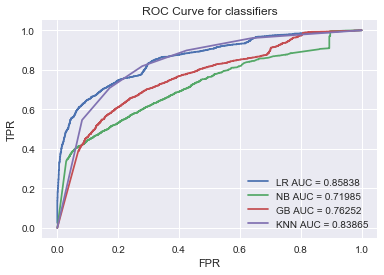

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Creating LogisticRegression() and BernoulliNB() models
for model, model_label in [(LogisticRegression(), "LR"), (BernoulliNB(), "NB"), (GaussianNB(), "GB"), (KNeighborsClassifier(), "KNN")]:
    # Fit the model
    model.fit(train_df.drop('Opioid.Prescriber',1), train_df['Opioid.Prescriber'])
    # Predictions
    predictions = model.predict_proba(test_df.drop('Opioid.Prescriber',1))[:, 1]
    # Calculate roc metrics
    fpr, tpr, thresholds = metrics.roc_curve(test_df['Opioid.Prescriber'], predictions)
    auc = metrics.roc_auc_score(test_df['Opioid.Prescriber'], predictions)
    # Plotting the AUC curve for both classifiers and both the binary and tfidf feature sets
    plt.plot(fpr, tpr, label=model_label + " AUC = " + str(round(auc, 5)))
    # Labelling Axes and Title
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve for classifiers")
plt.legend()
plt.show()

# Model Selection with Cross Validation

In [41]:
# With 'Gender' included
# Remove Target Variable Opioid.Prescriber
features = train_df.iloc[:,0:242]
target = train_df['Opioid.Prescriber']

Name=[]
Accuracy=[]

log_reg_model = LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
gaussian_nb_model = GaussianNB()
ber_nb_model= BernoulliNB()
knn_model = KNeighborsClassifier()

for model, label in zip([log_reg_model, gaussian_nb_model, ber_nb_model, knn_model], ['Logistic Regression','Naive Bayes','Bernoulli NB', 'KNN']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.606654 of model Logistic Regression
Accuracy: 0.612056 of model Naive Bayes
Accuracy: 0.625385 of model Bernoulli NB
Accuracy: 0.778765 of model KNN


In [42]:
# Gender not included
# Remove Target Variable Opioid.Prescriber

features = train_df.iloc[:,1:242]
target = train_df['Opioid.Prescriber']

Name=[]
Accuracy=[]

log_reg_model=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
gaussian_nb_model=GaussianNB()
ber_nb_model= BernoulliNB()
knn_model = KNeighborsClassifier()

for model, label in zip([log_reg_model, gaussian_nb_model, ber_nb_model, knn_model], ['Logistic Regression','Naive Bayes','Bernoulli NB', 'KNN']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.606654 of model Logistic Regression
Accuracy: 0.612157 of model Naive Bayes
Accuracy: 0.625485 of model Bernoulli NB
Accuracy: 0.778462 of model KNN


In [43]:
from sklearn.model_selection import KFold

# Takes as inputs a dataset, a label name, # of splits/folds (k), a sequence of values for  CC  (cs)
def xValSVM(dataset, label_name, k, cs, model):

    # Removing Target Variable from dataset and storing it seperately
    data = dataset.drop(label_name, axis=1)
    target = dataset[label_name]
    aucs = {}
    
    for f in range(2,k):
        cross_val = KFold(n_splits = f)
        
        # Split the data into data_train & data_validate 
        for data_train_index, data_validate_index in cross_val.split(X=data, y=target):
            data_train = dataset.iloc[data_train_index]
            data_validate = dataset.iloc[data_validate_index]
            
            for c in cs:
                # Fit the Model
                model.fit(data_train.drop(label_name, axis=1),data_train[label_name])
                # Predicting Labels, Calculating FPR, TPR, Thresholds and ROC Value using SVM Model
                predictions = model.predict_proba(data_validate.drop(label_name, axis=1))[:, 1]
                fpr, tpr, thresholds = metrics.roc_curve(data_validate[label_name], predictions)
                # Computes AUC_c_k on validation data
                AUC_c_k = metrics.roc_auc_score(data_validate[label_name], predictions)
                # Stores AUC_c_k in a dictionary of values
                if c in aucs:
                    aucs[c].append(AUC_c_k)
                else:
                    aucs[c] = [AUC_c_k]
                break
            break
    
    # Returns a dictionary, where each key-value pair is: c:[auc-c1,auc-c2,..auc-ck]
    return aucs

In [44]:
# Generate a sequence of 10C  values in the interval [10^(-8), ..., 10^1] (i.e., do all powers of 10 from -8 to 1).
cs = [10**i for i in range(-8,2)]

log_reg_model=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
gaussian_nb_model=GaussianNB()
ber_nb_model= BernoulliNB()
knn_model = KNeighborsClassifier()

Name=[]
Model_AUC=[]

for model, label in zip([log_reg_model, gaussian_nb_model, ber_nb_model, knn_model], ['Logistic Regression','Naive Bayes','Bernoulli NB', 'KNN']):
    # Cross-Validation
    aucs = xValSVM(train_df, 'Opioid.Prescriber', 10 , cs, model)
    mean_auc = pd.DataFrame(aucs).mean().mean()
    max_auc = pd.DataFrame(aucs).max().max()
    Model_AUC.append(mean_auc)
    Name.append(model.__class__.__name__)
    print("Mean AUC achieved: %f of model %s" % (mean_auc,label))
    print("Max AUC achieved: %f of model %s" % (max_auc,label))

Mean AUC achieved: 0.687947 of model Logistic Regression
Max AUC achieved: 0.693307 of model Logistic Regression
Mean AUC achieved: 0.748024 of model Naive Bayes
Max AUC achieved: 0.756834 of model Naive Bayes
Mean AUC achieved: 0.705855 of model Bernoulli NB
Max AUC achieved: 0.715753 of model Bernoulli NB
Mean AUC achieved: 0.826388 of model KNN
Max AUC achieved: 0.833309 of model KNN


## Model Evaluation

In [45]:
testset_df = test_df.drop('Opioid.Prescriber',1) 
testset_df = testset_df.drop('Gender',1) 
testset_df.head()

,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
6080,15,85,11,0,0,0,0,0,48,0,...,0,0,0,0,0,0,0,0,0,28
7682,36,35,0,0,0,0,90,0,17,0,...,0,0,0,0,0,0,49,0,0,35
5028,4,85,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
17750,34,74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12153,45,62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20,0,0,0,0


In [46]:
from sklearn.metrics import accuracy_score
classifers=[log_reg_model,gaussian_nb_model,ber_nb_model,knn_model]
out_sample_accuracy=[]
Name_2=[]

for each in classifers:
    fit=each.fit(features,target)
    pred=fit.predict(testset_df)
    accuracy=accuracy_score(test_df['Opioid.Prescriber'],pred)
    Name_2.append(each.__class__.__name__)
    out_sample_accuracy.append(accuracy)

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_actu = test_df['Opioid.Prescriber']
confusion_matrix(y_actu, pred)

array([[1481,  570],
       [ 529, 2372]])

In [48]:
#Precision-Recall Curve
sklearn.metrics.precision_recall_curve(y_actu, pred, pos_label=None, sample_weight=None)

(array([0.58582391, 0.80625425, 1.        ]),
 array([1.        , 0.81764909, 0.        ]),
 array([0, 1]))

In [49]:
#Precision-Recall Score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_actu, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.77


Text(0.5,1,'2-class Precision-Recall curve: AP=0.77')

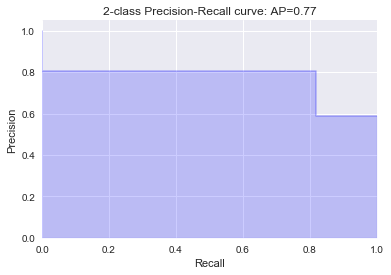

In [50]:
#Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_actu, pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))